In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

# E7: Lab Assignment 05

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## About this Lab
The objective of this assignment is to familiarize you with recursion.

## Autograder
You will be provided with some test cases (i.e., sample input data) and associated answers (i.e., expected outputs) that you can use to help check your code. The provided test cases are not exhaustive, and it is your responsibility to ensure that your code works in general, not just for a few supplied test cases. We may use additional hidden test cases in grading your lab assignments.

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

## Answer cells
Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and theses should be deleted and replaced with your answers.

Your answers must be in the cells marked `# ANSWER CELL`, including your final calculation/code. However, do not perform scratchwork in `# ANSWER CELL`. Add a new cell to perform your scratchwork. Your scratchwork will not be graded and does not need to be included in your submission unless otherwise noted.

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question| Points
--- | --
1 | 5.0
2.0 | 1.0
2.1–2.2 | 4.0
3 | 4.0
4.0–4.1 | 6.0
5.0 | 1.0
5.1 | 4.0
Total | 25.0

**Run the cell below**, to import the required modules.

In [83]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import heapq
import time
import matplotlib.pyplot as plt
import random
from random import choice
from string import ascii_lowercase
from timeit import default_timer as timer
np.seterr(all='ignore');

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Fibonacci Sequence

The Fibonacci Sequence can be defined by the recursive relationship $F_n = F_{n-1}+F_{n-2}$, where the first two numbers of the sequence by convention are $F_0 = 0$ and $F_1 = 1$. **Note that this is a slightly modified definition than the one we saw in the lecture, but both are equivalent.** $F_n$ is defined for any positive integer $n\geq2$.

\begin{equation}
F_n = \begin{cases}
    0 &\text{if $n=0$}\\
    1 &\text{if $n=1$}\\
    F_{n-1} + F_{n-2} & \text{if $n\geq2$}\\
    \end{cases}
\end{equation}

Using **recursion**, write a function `FibRec(n)` with output `F`, that returns the $n^{th}$ number in the Fibonacci sequence, $F_n$. If the input `n` is negative, the output `F` should be the string "n must be positive". If the input `n` is not an integer, the output `F` should be the string "n must be an integer". If the input `n` is both negative and not an integer, the output `F` should be the string "n must be a positive integer". Your function should **return** `F`, which would be the $n^{th}$ number in the Fibonacci sequence for valid input `n`, or a warning message for invalid input `n`.

Note that if `n` has a decimal point but without any fractional component (e.g., 10.0 and 10.), then `n` should be treated as an integer.

Be careful with your string formatting for invalid input `n`. Any small modification, such as extra space or character, will result in a failed test.

Once you are done, try out your new `FibRec()` function for `n = 18` in the following cell. Assign the output to `q1`. Feel free to try it for other inputs.

```
Examples:

>>> FibRec(12)
144

>>> FibRec(23)
28657

>>> FibRec(2.2)
'n must be an integer'

>>> FibRec(-10)
'n must be positive'

>>> FibRec(-10.1)
'n must be a positive integer'

>>> FibRec(10.0)
55
```

In [84]:
# ANSWER CELL
# BEGIN SOLUTION
def FibRec(n):
    """Return nth number in the Fibonacci sequence.
    >>> FibRec(12)
    144

    >>> FibRec(23)
    28657

    >>> FibRec(2.2)
    'n must be an integer'

    >>> FibRec(-10)
    'n must be positive'

    >>> FibRec(-10.1)
    'n must be a positive integer'

    >>> FibRec(10.0)
    55
    """
    if n < 0 and int(n) != n:
        return 'n must be a positive integer'
    elif int(n) != n:
        return 'n must be an integer'
    elif n < 0:
        return 'n must be positive'
    elif n == 0:
        F = 0
    elif n == 1:
        F = 1
    else:
        F = FibRec(n-1) + FibRec(n-2)
    
    return F
# END SOLUTION

In [85]:
# TEST YOUR FUNCTION HERE
q1 = FibRec(18) # SOLUTION

In [ ]:
grader.check("q1")

## Question 2: Ratio of Fibonacci Sequence
The ratio $r = \dfrac{F_n}{F_{n-1}}$ of consecutive Fibonacci numbers converges to a limit called the Golden Ratio. You will write a simple function to calculate $r = \dfrac{F_n}{F_{n-1}}$ and evaluate errors outputs from this simple function. Then you will use `try` and `except` statements to create a more robust function.

### Question 2.0: Simple ratio
Create a function `simpleFibRatio(n)` that returns `r`, where `r` is the ratio defined above for the values of the Fibonacci Sequence defined by `n`. Use the function `FibRec(n)` from Question 1 to calculate the ratio. **Do not** handle any exceptions or control for the input `n`.

Once you are done, try out your new `simpleFibRatio()` function for `n = 18` in the following cell. Assign the output to `q2_0`. Feel free to try it for other inputs.

```
Examples:

>>> simpleFibRatio(2)
1.0

>>> simpleFibRatio(3)
2.0

>>> simpleFibRatio(4)
1.5

>>> simpleFibRatio(20)
1.6180339631667064
```

In [93]:
# ANSWER CELL
# BEGIN SOLUTION
def simpleFibRatio(n):
    r = FibRec(n)/FibRec(n-1)
    return r
# END SOLUTION

In [94]:
# TEST YOUR FUNCTION HERE
q2_0 = simpleFibRatio(18) # SOLUTION

In [ ]:
grader.check("q2.0")

### Question 2.1: Ratio error for $n=1$
What error type do you get for `simpleFibRatio(n=1)`? Save the error type as a string named `q2_1_error`. Keep the same syntax as appeared in the error message. For instance, if a value error was raised, use the syntax 'ValueError' not 'value error'.

Once you determine the error type, create a new function called `midFibRatio(n)` that returns `r` from `simpleFibRatio()` if no error occurs, but returns `np.nan` for the error raised by `simpleFibRatio(n=1)`.

Once you are done, try out your new `midFibRatio()` function for `n = 18` and then `n = 1` in the following cell. Assign the output to `q2_1`. Feel free to try it for other inputs.

```
Examples:

>>> midFibRatio(2)
1.0

>>> midFibRatio(3)
2.0

>>> midFibRatio(4)
1.5

>>> midFibRatio(20)
1.6180339631667064

>>> midFibRatio(1)
nan

>>> a = midFibRatio(1) # make sure that you are using return rather than print
>>> a
nan
```

In [98]:
# ANSWER CELL
q2_1_error = 'ZeroDivisionError' # SOLUTION
# BEGIN SOLUTION NO PROMPT
def midFibRatio(n):
    try:
        r = simpleFibRatio(n)
    except ZeroDivisionError:
        r = np.nan
    return r
# END SOLUTION
""" # BEGIN PROMPT
def midFibRatio(n):
    try:
        ...
    except ...
        ...
    return r
""" # END PROMPT

' # BEGIN PROMPT\ndef midFibRatio(n):\n    try:\n        ...\n    except ...\n        ...\n    return r\n'

In [99]:
# TEST YOUR FUNCTION HERE
q2_1 = midFibRatio(1) # SOLUTION

In [ ]:
grader.check("q2.1")

### Question 2.2: Ratio error for fractions
What error type do you get for `simpleFibRatio(n=3.5)` or for any value less than 1? All these inputs should have the same error type. Save the error type as a string named `q2_2_error`. Keep the same syntax as appeared in the error message. For instance, if a value error was raised, use the syntax 'ValueError' not 'value error'.

Once you determine the error type, create a new function called `finalFibRatio(n)` that returns `r` from `simpleFibRatio()` if no error occurs, returns `np.nan` for the error raised by `simpleFibRatio(n=1)`, and returns `-999` for the error raised by inputting a non-positive or a fractional number.

Once you are done, try out your new `finalFibRatio()` function for`n = 18`, `n = 1`, and `n = -2`. in the following cell. Assign the output to `q2_2`. Feel free to try it for other inputs.

```
Examples:

>>> finalFibRatio(2)
1.0

>>> finalFibRatio(3)
2.0

>>> finalFibRatio(4)
1.5

>>> finalFibRatio(20)
1.6180339631667064

>>> finalFibRatio(1)
nan

>>> finalFibRatio(3.5)
-999

>>> finalFibRatio(-1)
-999
```

In [105]:
# ANSWER CELL
q2_2_error = 'TypeError' # SOLUTION

# BEGIN SOLUTION
def finalFibRatio(n):
    try:
        r = simpleFibRatio(n)
    except TypeError:
        r = -999
    except ZeroDivisionError:
        r = np.nan
    return r
# END SOLUTION

In [106]:
# TEST YOUR FUNCTION HERE
q2_2 = finalFibRatio(-2) # SOLUTION

In [ ]:
grader.check("q2.2")

## Question 3: Binary representations of integers

There are many ways to represent integers in binary format (i.e. with only zeros and ones). In this problem, we only consider 8-bit representations: each integer will be represented in binary format by a sequence of 8 zeros and/or ones. You will learn and use three different binary representations for integers: "unsigned representation", "signed-magnitude representation", and "two's complement representation". Each of these representations is detailed below.

In the unsigned representation, each bit represents a power of 2, from $2^0$ (right-most bit) to $2^7$ (left-most bit). For example, the binary representation 00100100 represents the integer $2^5 + 2^2 = 36$, and the binary representation 11101000 represents the integer $2^7+2^6+2^5+2^3 = 232$. Note that negative integers cannot be represented with the unsigned representation.

In the signed-magnitude representation, the left-most bit represents the sign of the integer. If the left-most bit is 0, then the integer is positive. If the left-most bit is 1, then the integer is negative. The other bits represent the magnitude of the integer, each bit representing a power of 2, from $2^0$ (right-most bit) to $2^6$ (seventh bit from the right). For example, the binary representation 00100100 still represents the number $2^5 + 2^2 = 36$, while the binary representation 11101000 now represents the number $-\left(2^6 + 2^5 + 2^3\right) = -104$. Note that there are two possible binary representations of zero in the signed-magnitude representation (00000000 and 10000000).

In the two's complement representation, the left-most bit represents $-2^7$ if it is 1, and 0 if it is 0. The other seven bits are used in the same way as in the unsigned and
signed-magnitude representations. For example, the binary representation 00100100 still represents the number 36, while the binary representation 11101000 now represents the
number $-2^7 + 2^6 + 2^5 + 2^3 = -24$.

Write a function `myBinary2Num(binary, representation)` that takes as input a character string of length 8 made of only zeros and ones (`binary`) and the name of the representation used for `binary` (`representation`) and returns `result`, which is the base-10 number corresponding to `binary` based on the number representation specified in `representation`.

You are not allowed to use any built-in function that converts from binary to decimal.

Constraints:
* `binary` should be a string of length 8 made of only zeros and ones. Otherwise, your function **should return** "binary should be a string of length 8 made of only 0 and 1".
* `representation` should be a string and can take one of the three following values: 'UnSign', 'Sign' and 'TC', which correspond to unsigned, signed-magnitude, and two's complement representations, respectively. Otherwise, your function **should return** "invalid representation".
* Your function should check `binary` first and then `representation` for valid inputs
* Be careful with your string formatting for invalid inputs. Any small modification, such as extra space or character, will result in a failed test.

Once you are done, try out your new `myBinary2Num()` function for `binary = '11001000'` and `representation = 'TC'` in the following cell. Assign the output to `q3`. Feel free to try it for other inputs.

```
Examples:

>>> myBinary2Num('11001000', 'UnSign')
200

>>> myBinary2Num('11001000', 'Sign')
-72

>>> myBinary2Num('11001000', 'TC')
-56

>>> myBinary2Num('01001110', 'UnSign')
78

>>> myBinary2Num('11001110', 'Sign')
-78

>>> myBinary2Num('11001110', 'TC')
-50

>>> myBinary2Num('1100111011001110', 'UnSign') # More than 8 bits
'binary should be a string of length 8 made of only 0 and 1'

>>> myBinary2Num('110010ab', 'UnSign') # bits include characters other than 0 and 1
'binary should be a string of length 8 made of only 0 and 1'

>>> myBinary2Num('11001000', 'unsigned') # representation should be 'UnSign'
'invalid representation'

>>> myBinary2Num('11001000', 'unsign') # strings are case-sensitive
'invalid representation'
```

In [113]:
# ANSWER CELL
# BEGIN SOLUTION
def myBinary2Num(binary, representation):
    """Return base-10 representation of binray based on the number represnetation specified in representation.
    >>> myBinary2Num('11001000', 'UnSign')
    200

    >>> myBinary2Num('11001000', 'Sign')
    -72

    >>> myBinary2Num('11001000', 'TC')
    -56

    >>> myBinary2Num('01001110', 'UnSign')
    78

    >>> myBinary2Num('11001110', 'Sign')
    -78

    >>> myBinary2Num('11001110', 'TC')
    -50
    """
    
    # check binary
    if type(binary) != str or len(binary) != 8 or not all(i in '01' for i in binary):
        return 'binary should be a string of length 8 made of only 0 and 1'
    
    # check representation
    if representation not in ['UnSign', 'Sign', 'TC']:
        return 'invalid representation'        
    
    # Initialize result
    result = 0

    if representation == 'UnSign':
        for i in range(0, len(binary)):
            if binary[i] == '1':
                result += 2**(7-i)

    elif representation == 'Sign':
        sign = 1
        if binary[0] == '1':
            sign = -1
        for i in range(1, len(binary)):
            if binary[i] == '1':
                result += 2**(7-i)
        result *= sign

    elif representation == 'TC':
        if binary[0] == '1':
            result = result - 2**7
        for i in range(1, len(binary)):
            if binary[i] == '1':
                result += 2**(7-i)
    
    return result
# END SOLUTION

In [114]:
# TEST YOUR FUNCTION HERE
q3 = myBinary2Num('10000001', 'TC') # SOLUTION

In [ ]:
grader.check("q3.0")

## Question 4: Floating Point Numbers

### 4.0: Comparing Floating Point Numbers

Write a function `myCompareFloats(x, y, tol)` that takes as input two numbers `x` and `y` and a tolerance value (`tol`) and returns `exact` and `approx`, both of which are of type `bool`. `exact` should be `True` if and only if `x` is exactly equal to `y` in Python, and otherwise `False`. `approx` should be `True` if and only if the difference between `x` and `y` (in absolute value) is less than or equal to `tol` in Python, and otherwise `False`. In other words, the function's output argument `approx` indicates whether `x` and `y` are "approximately equal", where "approximately equal" is quantified by the input argument `tol`. 

The default value of `tol` should be $1\times10^{-9}$. 

The first returned object should be `exact` and the second returned object should be `approx`.

The returned parameters `exact` and `approx` should be of type `bool`.

You do not have to check that the inputs are valid.

Once you are done, try out your new `myCompareFloats()` function for `x = 1e-4`, `y = 1.5e-4`, and `tol = 5e-5` in the following cell. Assign the output to `q4_0`. Feel free to try it for other inputs.

```
Examples:

>>> myCompareFloats(2+3, 5, 0)
(True, True)

>>> myCompareFloats(0, 0.001, 1e-2)
(False, True)

>>> myCompareFloats(0, 0.001, 1e-4)
(False, False)

>>> myCompareFloats(0, 0.001)
(False, False)
```

In [122]:
# ANSWER CELL
# BEGIN SOLUTION
def myCompareFloats(x, y, tol=1e-9):
    """Retrun (exact, approx) indicating whether x==y and whether x is approximately equal to y within tol.
    Examples
    --------
    >>> myCompareFloats(2+3, 5, 0)
    (True, True)

    >>> myCompareFloats(0, 0.001, 1e-2)
    (False, True)

    >>> myCompareFloats(0, 0.001, 1e-3)
    (False, False)

    >>> myCompareFloats(0, 0.001)
    (False, False)
    
    Arguments
    ----------
    x: scalar float, first element in comparison
    y: scalar float, second element in comparison
    tolerance: float, default = 1e-9
        allowable difference between x and y
    
    Returns
    -------
    exact: boolean, if the floats are exactly equal
    approx: boolean, if the floats are equal within the tolerance
    """
    exact = (x==y)
    approx = (abs(x-y)<=tol)
    
    return exact, approx
# END SOLUTION

In [123]:
# TEST YOUR FUNCTION HERE
q4_0 = myCompareFloats(1e-4, 1.5e-4, 5e-5) # SOLUTION

In [ ]:
grader.check("q4.0")

### 4.1: Binary representation of floating point numbers (IEEE-754)

There are multiple ways to represent floating point numbers in binary format (i.e. with only zeros and ones). The Institute of Electrical and Electronics Engineers (IEEE) defined a standard (called IEEE-754) for representing floating point numbers in binary format. IEEE-754 specifies different formats, depending on how many bits (e.g. 16 bits, 32 bits, 64 bits, 128 bits) are used to represent each floating point number. The formats that use 32 bits and 64 bits to represent each number are commonly known as "single precision" and "double precision", respectively. 

In this problem, we only consider single precision representations, where each number is represented using 32 bits (i.e. a sequence of 32 zeros and/or ones). In the IEEE-754 standard, the number represented by a sequence of 32 bits can be calculated using the following formula:

$$(-1)^s \times 2^{e-d} \times (1+f)$$

- $s$ is the value of the first bit
- $d$ is the bias, which is equal to $127$ for single precision
- $e$ is the integer represented by the 8 bits corresponding to the exponent, using the unsigned 8-bit integer representation (see Question 3)
- $f$ is the fraction represented by the last 23 bits, where each bit represents a *negative* power of $2$, from $2^{-1}$ (first bit of the fraction from the left) to $2^{-23}$ (last bit)

Below is a visualization of where $s$, $e$, and $f$ are stored within the binary string:

<img src="resources/IEEE_754_Single_Floating_Point_Format.png" style="width: 750px;"/>
<center> Figure 1: The memory layout of the IEEE 754 single precision floating number type. Dots indicate the end of each section. Image from: https://en.wikipedia.org/wiki/Single-precision_floating-point_format</center>

<br>

The above equation applies $\text{if} \; e \ne 0 \; \text{and} \; e \ne 255$. IEEE has reserved some values for special cases, as shown below:

$$\begin{align}
(-1)^s \times 2^{1-d} \times f && \text{if} \; e = 0 \; \text{and} \; f \ne 0 \\
0 && \text{if} \; e = 0 \; \text{and} \; f = 0 \\
(-1)^s \times \infty && \text{if} \; e = 255 \; \text{and} \; f = 0 \\
NaN \;(\text{Not a Number}) && \text{if} \; e = 255 \; \text{and} \; f \ne 0
\end{align}$$

Write a function `mySingle2Decimal(binary)` that takes as input a character string of length 32 made of only zeros and ones (`binary`) and returns `result`, which is the floating point number (in base 10) that is represented by `binary` using the IEEE-754 32-bit single precision binary representation. 

Use `np.inf` as the infinite value and `np.nan` for quantities which are "not a number".

Once you are done, try out your new `mySingle2Decimal()` function for `'01010101010101010101010101010101'` in the following cell. Assign the output to `q4_1`. Feel free to try it for other inputs.

*Hint:* Use your function `myBinary2Num()` to compute $e$.

```
Examples:

>>> mySingle2Decimal('00111111111100000000000000000000')
1.875

>>> mySingle2Decimal('10111111000000000000000000000000')
-0.5

>>> mySingle2Decimal('00100000100000000000000000000001')
2.1684046034649503e-19

>>> mySingle2Decimal('11111111100000000000000000000000')
-inf

>>> mySingle2Decimal('11111111100000000000000000000001')
nan

>>> mySingle2Decimal('10111111010000000000000000000000')
-0.75

>>> mySingle2Decimal('00100000100000000000111000000001')
2.1693310457510097e-19

```

In [129]:
# ANSWER CELL
# BEGIN SOLUTION
def mySingle2Decimal(binary):
    """
    Examples
    --------
    >>> mySingle2Decimal('00111111111100000000000000000000')
    1.875

    >>> mySingle2Decimal('10111111000000000000000000000000')
    -0.5

    >>> mySingle2Decimal('00100000100000000000000000000001')
    2.1684046034649503e-19

    >>> mySingle2Decimal('11111111100000000000000000000000')
    -inf

    >>> mySingle2Decimal('11111111100000000000000000000001')
    nan

    >>> mySingle2Decimal('10111111010000000000000000000000')
    -0.75

    >>> mySingle2Decimal('00100000100000000000111000000001')
    2.1693310457510097e-19
    
    Parameters
    ----------
    binary: 32-bit binary string
    
    Returns
    -------
    result: floating point number in base 10
    """
    value_s = int(binary[0])
    value_d = 127
    value_e = myBinary2Num(binary[1:9], 'UnSign')

    value_f = 0.
    
    for i in range(9,32):
        if binary[i] == '1':
            value_f = value_f + 2**(8-i)
            
    if not value_e == 0 and not value_e == 255:
        result = ((-1)**value_s)*(2**(value_e-value_d))*(1+value_f)
    elif value_e == 0 and not value_f == 0:
        result = ((-1)**value_s)*(2**(1-value_d))*value_f
    elif value_e == 0 and value_f == 0:
        result = 0
    elif value_e == 255 and value_f == 0:
        result = ((-1)**value_s)*np.Inf
    else:
        result = np.NaN

    return float(result)
# END SOLUTION

In [130]:
# TEST YOUR FUNCTION HERE
q4_1 = mySingle2Decimal('10111110000101010101110101100101') # SOLUTION

In [ ]:
grader.check("q4.1")

## Question 5: Sorting and efficiency of sorting algorithms

In this problem, you will write Python functions to sort elements of the periodic table in alphabetical order and then compare the efficiency of your sorting function against the efficiency of another sorting function. Note that the grading will not depend on the efficiency of your sorting algorithm, but your function does need to sort the elements properly.

### 5.0: Compare two elements

Write a function `myCompareElements(element1, element2)` that takes as input two strings each containing an element from the periodic table (for example: `element1 = 'Hydrogen'`, `element2 = 'Carbon'`), and returns `result`, which should be of type `int` and takes the following values:
- 0 if `element1` and `element2` are the same element.
- 1 if the name of `element1` comes before the name of `element2` in alphabetical order.
- -1 if the name of `element1` comes after the name of `element2` in alphabetical order.

For this question, your function should be **case-insensitive**, as we only care about the element's name.  

**You are not allowed to use any built-in sorting functions.**

Once you are done, try out your new `myCompareElements()` function for `'Berkelium'` and `'Californium'` in the following cell. Assign the output to `q5_0`. Feel free to try it for other inputs.

*Hint*: You can compare the alphabetical ordering of two single characters in Python using logical operators. Refer to the lecture on Python basics.

*Note*: When using logical operators, strings are case-sensitive. However, your function should be **case-insensitive**.

```
Examples:

>>> myCompareElements('Carbon', 'Hydrogen') # element1 comes before element2 alphabetically
1

>>> myCompareElements('Hydrogen' , 'Carbon') # element1 comes after element2 alphabetically
-1

>>> myCompareElements('Carbon', 'Carbon') # element1 and element2 are the same element
0

>>> myCompareElements('Carbon', 'carbon') # the function should be case-insensitive
0

>>> myCompareElements('Uranium', 'boron') # element1 comes after element2 alphabetically
-1
```

In [137]:
# ANSWER CELL
# BEGIN SOLUTION
def myCompareElements(element1, element2):
    """Return 0 if element1 and element2 are the same, 1 if element1 comes before element2 alphabetically, and -1 otherwise.
    Examples
    --------
    >>> myCompareElements('Carbon', 'Hydrogen') # element1 comes before element2 alphabetically
    1

    >>> myCompareElements('Hydrogen' , 'Carbon') # element1 comes after element2 alphabetically
    -1

    >>> myCompareElements('Carbon', 'Carbon') # element1 and element2 are the same element
    0

    >>> myCompareElements('Carbon', 'carbon') # the function should be case-insensitive
    0

    >>> myCompareElements('Uranium', 'boron') # element1 comes after element2 alphabetically
    -1
    
    Parameters
    ----------
    element1: name of an element in the periodic table
    element2: name of an element in the periodic table
    
    Returns
    -------
    comparison value
    """
    # convert both inputs to upper case so that answer is case-insensitive
    element1 = element1.upper()
    element2 = element2.upper()
    
    if element1 < element2:
        return 1
    elif element1 == element2:
        return 0
    else:
        return -1
# END SOLUTION

In [138]:
# TEST YOUR FUNCTION HERE
q5_0 = myCompareElements('Berkelium','Californium') # SOLUTION

In [ ]:
grader.check("q5.0")

### 5.1: Sort a list of elements

Write a function `mySortElements(elements)` that takes as input a $1 \times n$ list that represents a list of the names of $n$ elements from the periodic table as a character string (`elements`) and returns a $1 \times n$ list that represents the same list of elements as the one in `elements` but sorted in alphabetical order (`sorted_list`). If `elements` is an empty list, then `sorted_list` should be an empty list. 

`elements` could include multiple entries of the same element (i.e. there can be duplicate elements in the list). Repeated elements should also appear in the returned output `sorted`.

For this question, your function should be **case-insensitive**, as we only care about the elements' names.  

**You are not allowed to use any built-in sorting functions.**

**Do not modify the names of the elements. `sorted_list` should include the element names, exactly as they appear in `elements`.**

Once you are done, try out your new `mySortElements()` function for `['Chromium' , 'Barium' , 'Silver' , 'Lead' , 'Arsenic', 'Selenium', 'Mercury', 'Cadmium']` in the following cell. Assign the output to `q5_1`. Feel free to try it for other inputs.

*Hint:* You can implement the bubble or quick sort algorithms we discussed in the lecture. Use your function `myCompareElements()` to compare two elements.
    
```
Examples:

>>> mySortElements(['Hydrogen' , 'Carbon' , 'Magnesium' , 'Calcium' , 'Carbon'])
['Calcium', 'Carbon', 'Carbon', 'Hydrogen', 'Magnesium']

>>> mySortElements(['Dubnium','Bohrium','Copernicium','Meitnerium','Roentgenium'])
['Bohrium', 'Copernicium', 'Dubnium', 'Meitnerium', 'Roentgenium']

>>> mySortElements(['Argon','Argon'])
['Argon', 'Argon']

>>> mySortElements(['Argon','carbon', 'argon', 'Carbon'])
['Argon','argon', 'carbon', 'Carbon']
```

In [145]:
# ANSWER CELL
# BEGIN SOLUTION
def mySortElements(elements):
    """Sort a list of n elements alphabetically.
    Examples
    --------
    >>> mySortElements(['Hydrogen' , 'Carbon' , 'Magnesium' , 'Calcium' , 'Carbon'])
    ['Calcium', 'Carbon', 'Carbon', 'Hydrogen', 'Magnesium']

    >>> myCompareElements(['Dubnium','Bohrium','Copernicium','Meitnerium','Roentgenium'])
    ['Bohrium', 'Copernicium', 'Dubnium', 'Meitnerium', 'Roentgenium']

    >>> myCompareElements(['Argon','Argon'])
    ['Argon', 'Argon']

    >>> myCompareElements(['Argon','carbon', 'argon', 'Carbon'])
    ['Argon','argon', 'carbon', 'Carbon']

    Parameters
    ---------
    elements: 1xn list representing list of n elements of periodic table
    
    Returns
    -------
    sorted_list: 1xn list that represents the sorted list
    """
    
    if len(elements) <= 1:
        # list of length 1 is easiest to sort 
        # because it is already sorted
        
        sorted_list = elements    
        
    else:
        
         # select pivot as the first element of the list
        pivot = elements[0]
        
        # initialize lists for bigger and smaller elements 
        # as well those equal to the pivot
        bigger = []
        smaller = []
        same = []
        
        # loop through list and put elements into appropriate array
        
        for item in elements:
            
            comp_value = myCompareElements(pivot,item) # Compare elements
            
            if comp_value == 1:
                bigger.append(item)
            elif comp_value == -1:
                smaller.append(item)
            else:
                same.append(item)
        
        sorted_list = mySortElements(smaller) + same + mySortElements(bigger)
        
    return sorted_list
# END SOLUTION

In [146]:
# TEST YOUR FUNCTION HERE
q5_1 = mySortElements(['Chromium', 'Barium', 'Silver', 'Lead', 'Arsenic', 'Selenium', 'Mercury', 'Cadmium']) # SOLUTION

In [ ]:
grader.check("q5.1")

### Efficiency of sorting algorithms

You do not need to modify this section but you must first complete question 5.1. Run the pre-made function `CompareSorting` to visualize the differences between the efficiency of your sorting algorithm and the internal Python sorting algorithm. Here, we define efficiency as the time taken by the sorting function to sort a given list of elements. Note that there are many other criteria that should be considered for a more exhaustive characterization of the efficiency of an algorithm (for example RAM usage), but we do not consider these in this assignment.

In [155]:
# DO NOT EDIT
def CompareSorting(n):
    """Plot the run time of student-made and internal Python sorting algorithms.
    
    Parameters
    ----------
    n: int, length of list to sort
       Recommend n<5000 for quick plotting
     
    Returns
    -------
    None
    
    Plots
    -----
    Comparison of sorting algorithms: Wall time (ms) vs. size of list to sort
        student: sort time of student-made mySortElements function
        internal: sort time of sorted Python function
        
    """
    time_student = []
    time_internal = []
    elems = [''.join(choice(ascii_lowercase) for _ in range(random.randint(3, 9))) for _ in range(int(n))]
    
    x_ax = []
    i = 64
    while i <= n:
        t = time.time()
        mySortElements(elems[:i])
        time_student.append((time.time() - t)*1000)

        t = time.time()
        sorted(elems[:i])
        time_internal.append((time.time() - t)*1000)

        x_ax.append(i)
        i *= 2 
    print('size of list:',x_ax)
    with np.printoptions(precision=3,suppress=True):
        print('Student algorithm time (ms):',np.array(time_student))
        print('Internal algorithm time (ms):',np.array(time_internal))
    fig, ax = plt.subplots()
    plt.xlabel('Size')
    plt.ylabel('Wall time (ms)')
    plt.title('Comparison of sorting algorithms')
    ax.plot(x_ax, time_student, label='student')
    ax.plot(x_ax, time_internal, label='internal')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()

Run the cell below to call `CompareSorting` and visualize the difference in efficiency between your sorting algorithm and the internal Python sorting algorithm for different input sizes.

size of list: [64, 128, 256, 512, 1024, 2048, 4096]
Student algorithm time (ms): [ 0.168  0.36   0.711  1.596  3.657  8.009 18.454]
Internal algorithm time (ms): [0.009 0.014 0.027 0.062 0.143 0.312 0.688]


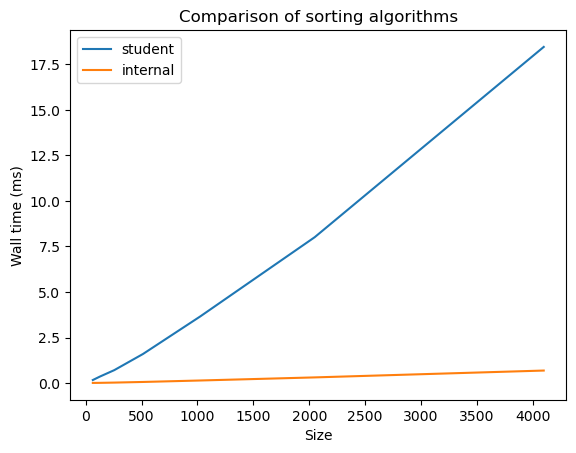

In [156]:
CompareSorting(n=2**12)

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing lab 5!


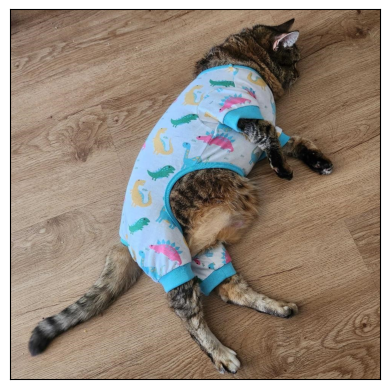

In [157]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing lab 5!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)